## Observations and Insights

In [ ]:
# 1. Weight of mouse and tumor size have a strong correlation 
# 2. Of the 4 top drugs Capomulin and Ramicane have the highest level of efficacy
# 3. Capomulin and Ramicane also had the highest number of data points so the efficacy of these drugs could be inflated by sample bias further investigation is needed. 

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
merge_df['Timepoint'].value_counts()

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [6]:
merge_df["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

## Summary statistics

In [7]:

def summary(drug_name):
    temp = merge_df.loc[merge_df['Drug Regimen'] == drug_name].mean()
    mean = temp['Tumor Volume (mm3)']
    temp = merge_df.loc[merge_df['Drug Regimen'] == drug_name].median()
    median = temp['Tumor Volume (mm3)']
    temp = merge_df.loc[merge_df['Drug Regimen'] == drug_name].var()
    variance = temp['Tumor Volume (mm3)']
    temp = merge_df.loc[merge_df['Drug Regimen'] == drug_name].sem()
    standard_error_measure = temp['Tumor Volume (mm3)']
    temp = merge_df.loc[merge_df['Drug Regimen'] == drug_name].std()
    standard_dev = temp['Tumor Volume (mm3)']
    return[mean, median, variance, standard_error_measure, standard_dev]

summary("Capomulin")

[40.675741141,
 41.557808879999996,
 24.947764120254853,
 0.32934562340083096,
 4.9947736805840215]

In [8]:
summary("Ramicane")

[40.21674506671052,
 40.67323554,
 23.486703952095258,
 0.3209546065084816,
 4.846308280753016]

In [9]:
summary("Ketapril")

[55.23563764047873,
 53.698742644999996,
 68.55357711244599,
 0.6038598237739697,
 8.279708757706759]

In [10]:
summary("Naftisol")

[54.331564658333335,
 52.509284609999995,
 66.17347898736507,
 0.5964657512424235,
 8.134708291473338]

In [11]:
summary("Zoniferol")

[53.23650655159341,
 51.818479325,
 48.533355389386095,
 0.5163978968332169,
 6.966588504381904]

In [12]:
summary("Placebo")

[54.03358078635359,
 52.28893409,
 61.16808293669703,
 0.5813305510593876,
 7.821002681031188]

In [13]:
summary("Stelasyn")

[54.23314911988951,
 52.43173664,
 59.45056167336598,
 0.5731109332771458,
 7.7104190335782645]

In [14]:
summary("Ceftamin")

[52.59117180960675,
 51.77615728000001,
 39.290177273278594,
 0.46982053275261093,
 6.2681877184141985]

In [15]:
summary("Infubinol")

[52.88479510859551,
 51.82058438,
 43.12868412883606,
 0.4922356938011383,
 6.5672432670669405]

In [16]:
summary("Propriva")

[52.3225520357764,
 50.8546323,
 42.35106963363814,
 0.5128841213647222,
 6.507769943201599]

In [19]:
drug_summary_dict = {
    "Treatment" : ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'],
    "Mean" : [40.675741141, 40.21674506671052, 55.23563764047873, 54.331564658333335, 53.23650655159341, 54.03358078635359, 54.23314911988951, 52.59117180960675, 52.88479510859551, 52.3225520357764],
    "Median" : [41.557808879999996, 40.67323554, 53.698742644999996, 52.509284609999995, 51.818479325, 52.28893409, 52.43173664, 51.77615728000001,  51.82058438, 50.8546323],
    "Variance" : [24.947764120254853, 23.486703952095258, 68.55357711244599, 66.17347898736507, 48.533355389386095, 61.16808293669703, 59.45056167336598, 39.290177273278594, 43.12868412883606, 42.35106963363814],
    "Standard Error Measure" : [0.32934562340083096, 0.3209546065084816, 0.6038598237739697, 0.5964657512424235, 0.5163978968332169, 0.5813305510593876, 0.5731109332771458, 0.46982053275261093, 0.4922356938011383, 0.5128841213647222],
    "Standard Deviation" : [4.9947736805840215, 4.846308280753016, 8.279708757706759, 8.134708291473338, 6.966588504381904, 7.821002681031188, 7.7104190335782645, 6.2681877184141985, 6.5672432670669405, 6.507769943201599]
}
drug_summary_df = pd.DataFrame(drug_summary_dict)
drug_summary_df

,Treatment,Mean,Median,Variance,Standard Error Measure,Standard Deviation
0,Capomulin,40.675741,41.557809,24.947764,0.329346,4.994774
1,Ramicane,40.216745,40.673236,23.486704,0.320955,4.846308
2,Ketapril,55.235638,53.698743,68.553577,0.603860,8.279709
3,Naftisol,54.331565,52.509285,66.173479,0.596466,8.134708
4,Zoniferol,53.236507,51.818479,48.533355,0.516398,6.966589
5,Placebo,54.033581,52.288934,61.168083,0.581331,7.821003
6,Stelasyn,54.233149,52.431737,59.450562,0.573111,7.710419
7,Ceftamin,52.591172,51.776157,39.290177,0.469821,6.268188
8,Infubinol,52.884795,51.820584,43.128684,0.492236,6.567243
9,Propriva,52.322552,50.854632,42.351070,0.512884,6.507770


In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_summary_df


,Mean,Median,Variance,Standard Error Measure,Standard Deviation
0,40.675741,41.557809,24.947764,0.329346,4.994774
1,40.216745,40.673236,23.486704,0.320955,4.846308
2,55.235638,53.698743,68.553577,0.603860,8.279709
3,54.331565,52.509285,66.173479,0.596466,8.134708
4,53.236507,51.818479,48.533355,0.516398,6.966589
5,54.033581,52.288934,61.168083,0.581331,7.821003
6,54.233149,52.431737,59.450562,0.573111,7.710419
7,52.591172,51.776157,39.290177,0.469821,6.268188
8,52.884795,51.820584,43.128684,0.492236,6.567243
9,52.322552,50.854632,42.351070,0.512884,6.507770


## Bar plots

In [57]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drugs = merge_df["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

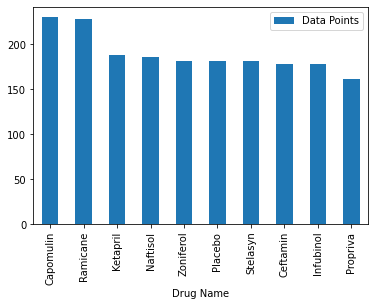

In [67]:
drug_bar_dict = {
    "Drug Name" : ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"],
    "Data Points" : [230, 228, 188, 186, 182, 181, 181, 178, 178, 161]
}
drugs_bar_df = pd.DataFrame(drug_bar_dict)
drugs_bar_df.head()
drugs_bar_df.plot(x='Drug Name', y='Data Points', kind='bar')
# plt.bar(drugs_bar_df['Drug Name'], drugs_bar_df['Data Points'])

<BarContainer object of 10 artists>

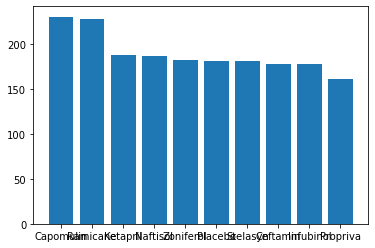

In [68]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(drugs_bar_df['Drug Name'], drugs_bar_df['Data Points'])

## Pie plots

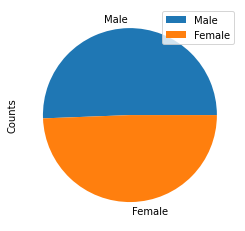

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
temp = merge_df.loc[merge_df['Sex'] == 'Male'].count()
male_count = temp['Sex']
temp = merge_df.loc[merge_df['Sex'] == 'Female'].count()
female_count = temp['Sex']
sex_dict = {
    "Sex" : ["Male", "Female"],
    "Counts" : [male_count, female_count]
}
sex_dist = pd.DataFrame(sex_dict)
sex_distribution = pd.DataFrame(sex_dict)
sex_distribution.set_index("Sex",inplace=True)
sex_distribution.head()
sex_distribution.plot(kind='pie', y='Counts', legend='True')

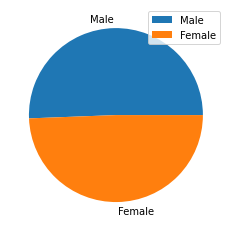

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_dist['Counts'], labels=sex_dist['Sex'])
plt.legend()

## Quartiles, outliers and boxplots

In [108]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
timepoint_45_df = merge_df.loc[merge_df['Timepoint'] == 45]
timepoint_45_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


Text(0, 0.5, 'Tumor Volume (mm3)')

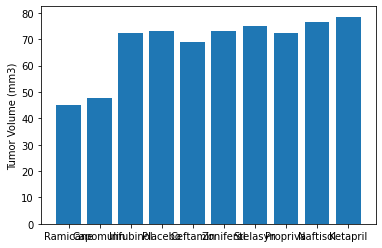

In [191]:
plt.bar(timepoint_45_df['Drug Regimen'],timepoint_45_df['Tumor Volume (mm3)'])
plt.ylabel("Tumor Volume (mm3)")

In [113]:
capomulin = timepoint_45_df.loc[timepoint_45_df['Drug Regimen'] == 'Capomulin']
capomulin_tumor_volume = capomulin['Tumor Volume (mm3)']
ramicane = timepoint_45_df.loc[timepoint_45_df['Drug Regimen'] == 'Ramicane']
ramicane_tumor_volume = ramicane['Tumor Volume (mm3)']
ceftamin = timepoint_45_df.loc[timepoint_45_df['Drug Regimen'] == 'Ceftamin']
ceftamin_tumor_volume = ceftamin['Tumor Volume (mm3)']
infubinol = timepoint_45_df.loc[timepoint_45_df['Drug Regimen'] == 'Infubinol']
infubinol_tumor_volume = infubinol['Tumor Volume (mm3)']
top_four_dict = {
    "Drug Regimen" : ["Capomulin", "Ramicane", "Ceftamin", "Infubinol"],
    "Tumor Volume (mm3)" : [capomulin_tumor_volume, ramicane_tumor_volume, ceftamin_tumor_volume, infubinol_tumor_volume]
}
print("Quartiles for Capomulin")
quartiles = capomulin_tumor_volume.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(
    f"""The lower quartile for Capomulin Tumor Volume is: {lowerq}\n
    the upper quartile for Capomulin Tumor Volume is: {upperq}\n
    the interquartile range for Capomulin Tumor Volume is: {iqr}\n
    the median of Capomulin Tumor Volume is: {quartiles.loc[0.5]}""")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"""Values below {lower_bound} could be outliers\n
Values above {upper_bound} could be outliers""")

# top_four_df = pd.DataFrame(top_four_dict)
# top_four_df


Quartiles for Capomulin
The lower quartile for Capomulin Tumor Volume is: 32.37735684

    the upper quartile for Capomulin Tumor Volume is: 40.1592203

    the interquartile range for Capomulin Tumor Volume is: 7.781863460000004

    the median of Capomulin Tumor Volume is: 37.31184577
Values below 20.70456164999999 could be outliers

Values above 51.83201549 could be outliers


In [114]:
print("Quartiles for Ramicane")
quartiles = ramicane_tumor_volume.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(
    f"""The lower quartile for Ramicane Tumor Volume is: {lowerq}\n
    the upper quartile for Ramicane Tumor Volume is: {upperq}\n
    the interquartile range for Ramicane Tumor Volume is: {iqr}\n
    the median of Ramicane Tumor Volume is: {quartiles.loc[0.5]}""")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"""Values below {lower_bound} could be outliers\n
Values above {upper_bound} could be outliers""")

Quartiles for Ramicane
The lower quartile for Ramicane Tumor Volume is: 30.981175224999998

    the upper quartile for Ramicane Tumor Volume is: 38.508305307499995

    the interquartile range for Ramicane Tumor Volume is: 7.527130082499998

    the median of Ramicane Tumor Volume is: 34.848627300000004
Values below 19.690480101250003 could be outliers

Values above 49.79900043124999 could be outliers


In [115]:
print("Quartiles for Ceftamin")
quartiles = ceftamin_tumor_volume.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(
    f"""The lower quartile for Ceftamin Tumor Volume is: {lowerq}\n
    the upper quartile for Ceftamin Tumor Volume is: {upperq}\n
    the interquartile range for Ceftamin Tumor Volume is: {iqr}\n
    the median of Ceftamin Tumor Volume is: {quartiles.loc[0.5]}""")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"""Values below {lower_bound} could be outliers\n
Values above {upper_bound} could be outliers""")

Quartiles for Ceftamin
The lower quartile for Ceftamin Tumor Volume is: 61.43389223

    the upper quartile for Ceftamin Tumor Volume is: 67.52748237

    the interquartile range for Ceftamin Tumor Volume is: 6.093590140000003

    the median of Ceftamin Tumor Volume is: 64.29983003
Values below 52.29350701999999 could be outliers

Values above 76.66786758 could be outliers


In [116]:
print("Quartiles for Infubinol")
quartiles = infubinol_tumor_volume.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(
    f"""The lower quartile for Infubinol Tumor Volume is: {lowerq}\n
    the upper quartile for Infubinol Tumor Volume is: {upperq}\n
    the interquartile range for Infubinol Tumor Volume is: {iqr}\n
    the median of Infubinol Tumor Volume is: {quartiles.loc[0.5]}""")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"""Values below {lower_bound} could be outliers\n
Values above {upper_bound} could be outliers""")

Quartiles for Infubinol
The lower quartile for Infubinol Tumor Volume is: 62.75445141

    the upper quartile for Infubinol Tumor Volume is: 67.68556862

    the interquartile range for Infubinol Tumor Volume is: 4.9311172099999965

    the median of Infubinol Tumor Volume is: 66.08306589
Values below 55.35777559500001 could be outliers

Values above 75.08224443499999 could be outliers


{'whiskers': [<matplotlib.lines.Line2D at 0x20b50d056c8>,
 'caps': [<matplotlib.lines.Line2D at 0x20b50d05888>,
 'boxes': [<matplotlib.patches.PathPatch at 0x20b50d05348>,
 'medians': [<matplotlib.lines.Line2D at 0x20b49121208>,
 'fliers': [<matplotlib.lines.Line2D at 0x20b50fc4dc8>,
 'means': []}

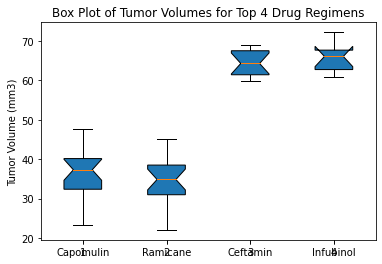

In [123]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [capomulin_tumor_volume, ramicane_tumor_volume, ceftamin_tumor_volume, infubinol_tumor_volume]
green_diamond = dict(markerfacecolor='g', marker='D')
fig7, ax7 = plt.subplots()
ax7.set_title("Box Plot of Tumor Volumes for Top 4 Drug Regimens")
plt.xticks([1, 2, 3, 4],["Capomulin", "Ramicane", "Ceftamin", "Infubinol"])
plt.ylabel("Tumor Volume (mm3)")
ax7.boxplot(data, flierprops=green_diamond, patch_artist=True, notch=True)

## Line and scatter plots

In [130]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse = merge_df.loc[merge_df['Drug Regimen'] == "Capomulin"]
capomulin_one_mouse = capomulin_mouse.head(10)
capomulin_one_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


Text(0.5, 0, 'Timepoints')

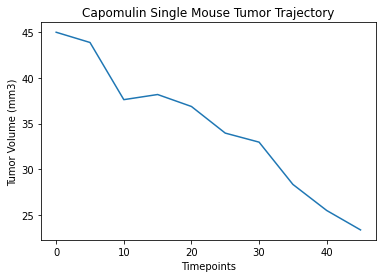

In [135]:
plt.plot([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], capomulin_one_mouse['Tumor Volume (mm3)'])
plt.title("Capomulin Single Mouse Tumor Trajectory")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoints")

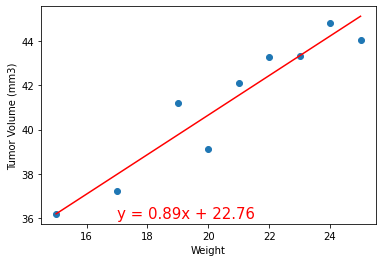

In [189]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
grouped_df = capomulin_mouse.groupby(["Weight (g)"])["Tumor Volume (mm3)"].mean()
grouped = pd.DataFrame(grouped_df)
grouped.reset_index()
grouped.head(16)
x_dict = {
    "Key" : [0, 1, 2, 3, 4, 5, 6, 7, 8],
    "x_values" : [15, 17, 19, 20, 21, 22, 23, 24, 25]
}
x_df = pd.DataFrame(x_dict)
x_values = x_df['x_values']
y_values = grouped['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(17, 36), fontsize=15, color='red')
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [197]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
r, p = st.stats.pearsonr(x_values, y_values)
print(p)
print(r)

8.44945104064636e-05
0.9505243961855268
